In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
data=pd.read_csv("/Users/jayanthrachamadugu/Downloads/deliverytime.txt")

In [22]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [26]:
data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [36]:
data.groupby('Type_of_order').size()

Type_of_order
Buffet     11280
Drinks     11322
Meal       11458
Snack      11533
dtype: int64

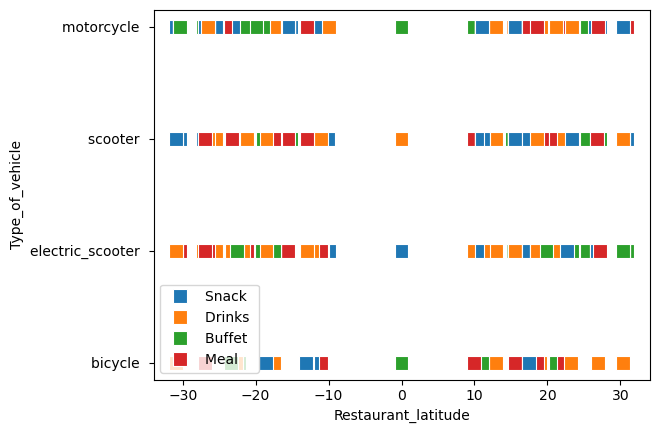

In [78]:
sns.scatterplot(x='Restaurant_latitude',y='Type_of_vehicle',data=data,hue='Type_of_order',s=100,marker='s')
plt.legend(loc='best')

In [86]:
R = 6371
def deg_to_rad(degrees):
    return degrees * (np.pi/180)
def distcalculate(lat1, lon1, lat2, lon2):
    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c
data['distance'] = np.nan
for i in range(len(data)):
    data.loc[i, 'distance'] = distcalculate(data.loc[i, 'Restaurant_latitude'], 
                                        data.loc[i, 'Restaurant_longitude'], 
                                        data.loc[i, 'Delivery_location_latitude'], 
                                        data.loc[i, 'Delivery_location_longitude'])

In [128]:
data.groupby('distance').size()

distance
1.465067        3
1.465123        4
1.465140        3
1.465159        4
1.465161        4
               ..
19070.408110    1
19677.180552    1
19683.687561    1
19688.001288    1
19692.674606    1
Length: 4791, dtype: int64

In [90]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.025149
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.183530
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.552758
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.790401
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.210138


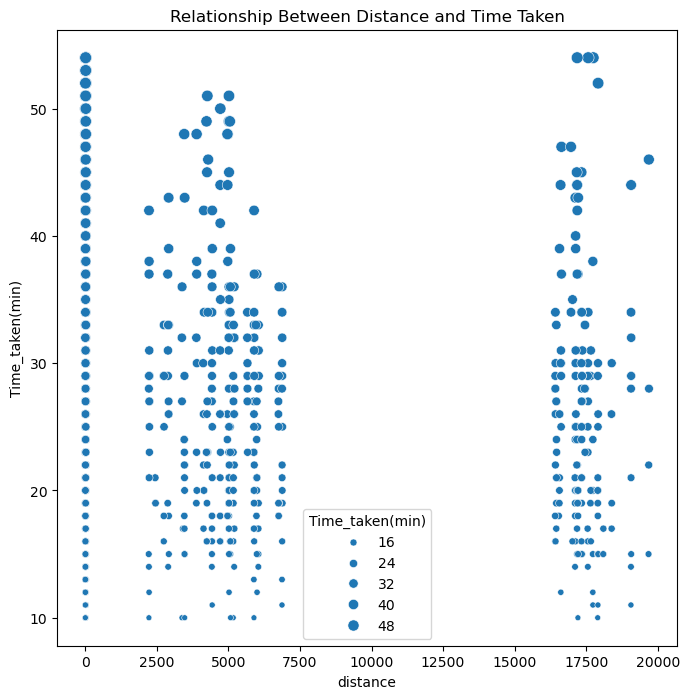

In [134]:
figure=plt.figure(figsize=(8,8))
sns.scatterplot(data= data, x="distance",y="Time_taken(min)", size="Time_taken(min)")
plt.title("Relationship Between Distance and Time Taken")
plt.show()


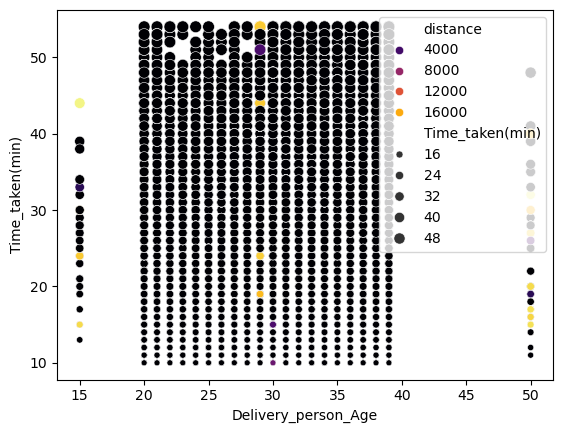

In [138]:
sns.scatterplot(data = data, x="Delivery_person_Age",y="Time_taken(min)", size="Time_taken(min)",hue = "distance",palette="inferno")
plt.show()

In [143]:
from sklearn.model_selection import train_test_split
x = np.array(data[["Delivery_person_Age", 
                   "Delivery_person_Ratings", 
                   "distance"]])
y = np.array(data[["Time_taken(min)"]])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.10, 
                                                random_state=42)

# creating the LSTM neural network model
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [145]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=9)

Epoch 1/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 57s 1ms/step - loss: 75.8042
Epoch 2/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 56s 1ms/step - loss: 64.2444
Epoch 3/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 57s 1ms/step - loss: 62.0892
Epoch 4/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 57s 1ms/step - loss: 59.7843
Epoch 5/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 57s 1ms/step - loss: 60.0380
Epoch 6/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 57s 1ms/step - loss: 59.7033
Epoch 7/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 57s 1ms/step - loss: 58.7612
Epoch 8/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 58s 1ms/step - loss: 58.5380
Epoch 9/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 58s 1ms/step - loss: 59.0850


In [147]:
"Food Delivery Time Prediction"
a = int(input("Age of Delivery Partner: "))
b = float(input("Ratings of Previous Deliveries: "))
c = int(input("Total Distance: "))

features = np.array([[a, b, c]])
print("Predicted Delivery Time in Minutes = ", model.predict(features))

Age of Delivery Partner:  40
Ratings of Previous Deliveries:  3.0
Total Distance:  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Predicted Delivery Time in Minutes =  [[29.913578]]
